In [1]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 256

# Load local account information
#IBMQ.save_account('cdad9ef01fbad88f5ee99fa7fc4cfb7b5eb8755c52fd1697690c6b680797a57384a80d5a6bfd5e99332b8ee8a58e74e3903034a7f4c19eb9d29b9e3da35aff0d')
IBMQ.load_account()

C:\Users\user\Downloads\anaconda\envs\IBMQ\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Statevector
from numpy import pi

# importing Qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

# import basic plot tools
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [3]:
# Problem 2-(a)

In [4]:
# Inversion about mean
qc = QuantumCircuit(4)
qc.x(3)
# Apply transformation |s> -> |00..0> (H-gates)
for qubit in range(4):
    qc.h(qubit)

# Draw
qc.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤┌───┐
q_3: ┤ X ├┤ H ├
     └───┘└───┘

Before oracle:  [ 0.25-3.061617e-17j  0.25-3.061617e-17j  0.25-3.061617e-17j
  0.25-3.061617e-17j  0.25-3.061617e-17j  0.25-3.061617e-17j
  0.25-3.061617e-17j  0.25-3.061617e-17j -0.25+3.061617e-17j
 -0.25+3.061617e-17j -0.25+3.061617e-17j -0.25+3.061617e-17j
 -0.25+3.061617e-17j -0.25+3.061617e-17j -0.25+3.061617e-17j
 -0.25+3.061617e-17j]


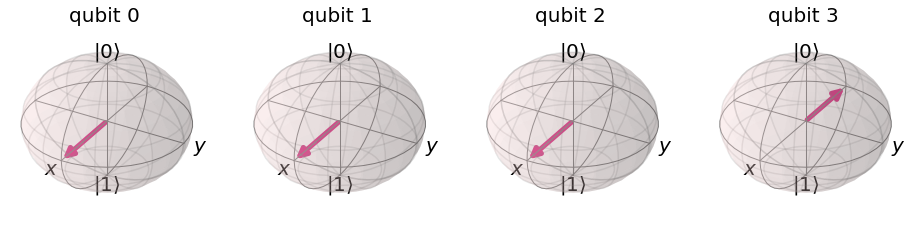

In [5]:
# optional, verify qubit state by using the following commands to get the vector form 
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector1 = result.get_statevector()
print("Before oracle: ", statevector1)
plot_bloch_multivector(statevector1)

In [6]:
# Inversion about mean
qc = QuantumCircuit(4)
qc.x(3)
# Apply transformation |s> -> |00..0> (H-gates)
for qubit in range(4):
    qc.h(qubit)
qc.x(0)
qc.mct(list(range(3)), 3)  # multi-controlled-toffoli
# Apply transformation |11..1> -> |00..0>
qc.x(0)

# Draw
qc.draw()

┌───┐┌───┐     ┌───┐
q_0: ┤ H ├┤ X ├──■──┤ X ├
     ├───┤└───┘  │  └───┘
q_1: ┤ H ├───────■───────
     ├───┤       │       
q_2: ┤ H ├───────■───────
     ├───┤┌───┐┌─┴─┐     
q_3: ┤ X ├┤ H ├┤ X ├─────
     └───┘└───┘└───┘

After oracle:  [ 0.25-6.12323400e-17j  0.25-6.12323400e-17j  0.25-6.12323400e-17j
  0.25-6.12323400e-17j  0.25-6.12323400e-17j  0.25-6.12323400e-17j
 -0.25+1.22464680e-16j  0.25-6.12323400e-17j -0.25+9.18485099e-17j
 -0.25+9.18485099e-17j -0.25+9.18485099e-17j -0.25+9.18485099e-17j
 -0.25+9.18485099e-17j -0.25+9.18485099e-17j  0.25-9.18485099e-17j
 -0.25+9.18485099e-17j]


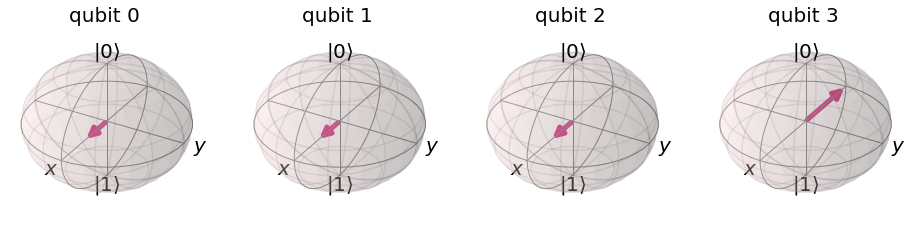

In [7]:
# optional, verify qubit state by using the following commands to get the vector form 
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector2 = result.get_statevector()
print("After oracle: ", statevector2)
plot_bloch_multivector(statevector2)

In [8]:
print("After oracle - Before oracle: ", statevector1-statevector2)

After oracle - Before oracle:  [ 0. +3.0616170e-17j  0. +3.0616170e-17j  0. +3.0616170e-17j
  0. +3.0616170e-17j  0. +3.0616170e-17j  0. +3.0616170e-17j
  0.5-1.5308085e-16j  0. +3.0616170e-17j  0. -6.1232340e-17j
  0. -6.1232340e-17j  0. -6.1232340e-17j  0. -6.1232340e-17j
  0. -6.1232340e-17j  0. -6.1232340e-17j -0.5+1.2246468e-16j
  0. -6.1232340e-17j]


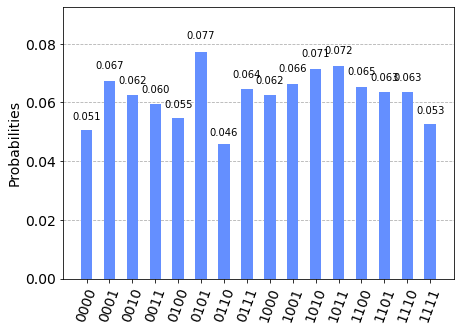

In [9]:
qc.measure_all()
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [10]:
# Problem 2-(b)

In [11]:
# Inversion about mean
nqubits = 3
qc = QuantumCircuit(nqubits)
# Apply transformation |s> -> |00..0> (H-gates)
for qubit in range(nqubits):
    qc.h(qubit)
# Apply transformation |00..0> -> |11..1> (X-gates)
for qubit in range(nqubits):
    qc.x(qubit)
# Do multi-controlled-Z gate
qc.h(nqubits-1)
qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
qc.h(nqubits-1)
# Apply transformation |11..1> -> |00..0>
for qubit in range(nqubits):
    qc.x(qubit)
# Apply transformation |00..0> -> |s>
for qubit in range(nqubits):
    qc.h(qubit)

# Draw
qc.draw()

┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_2: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘

In [12]:
# Problem 2-(c)

In [13]:
def initialize_s(qc, qubits):
    for q in qubits:
        qc.h(q)
    return qc

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U_inv"
    return U_s

In [14]:
# Oracle
qco = QuantumCircuit(3)
qco.x(0)
qco.h(2)
qco.mct(list(range(2)), 2)
qco.h(2)
qco.x(0)
oracle_ex3 = qco.to_gate()
oracle_ex3.name = "Oracle"

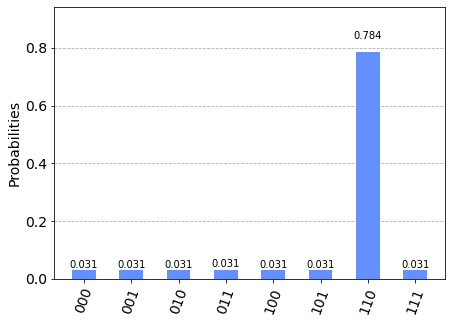

In [15]:
# qasm simulator
n = 3
qc1 = QuantumCircuit(n)
qc1 = initialize_s(qc1, [0,1,2])
qc1.append(oracle_ex3, [0,1,2])
qc1.append(diffuser(n), [0,1,2])
qc1.measure_all()
backend = Aer.get_backend('qasm_simulator')
results = execute(qc1, backend=backend, shots=100000).result()
answer = results.get_counts()
plot_histogram(answer)

In [16]:
prob = []
U_num = 1
for i in range(20):
    q2 = QuantumRegister(4)
    c2 = ClassicalRegister(4)
    qc2 = QuantumCircuit(q2, c2)
    qc2 = initialize_s(qc2, [0, 1, 2])
    qc2.append(oracle_ex3, [0, 1, 2])
    for i in range(U_num):
        qc2.append(diffuser(4), [0, 1, 2, 3])
    correct = 0
    for j in range(100):
        qc2.measure([0, 1, 2], [0, 1, 2])
        backend = Aer.get_backend('qasm_simulator')
        results = execute(qc2, backend=backend, shots=1024).result()
        answer = results.get_counts()
        # Count
        maxi = 0
        bit = ""
        for i in answer:
            if (answer[i] > maxi):
                maxi = answer[i]
                bit = i
        if (bit == "0110"): 
            correct += 1
    prob.append(correct/100)
    U_num += 1
print("20 iteration's probability: ", prob)

20 iteration's probability:  [1.0, 0.12, 1.0, 0.09, 1.0, 0.13, 1.0, 0.14, 1.0, 0.12, 1.0, 0.16, 1.0, 0.15, 1.0, 0.11, 1.0, 0.09, 1.0, 0.1]


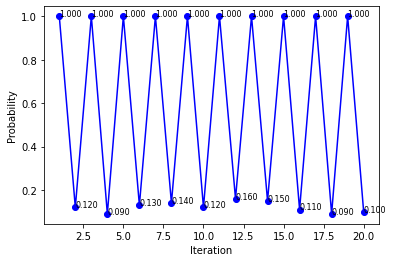

In [17]:
# Plot
plt.xlabel("Iteration")
plt.ylabel("Probability")

ite = []
for i in range(20): ite.append(i+1)
    
for x, y in zip(ite, prob):
    plt.text(x, y,'%.3f' % y,fontdict={'fontsize':8})
    
plt.plot(ite, prob, 'b-o')

In [18]:
# Problem 2-(d)

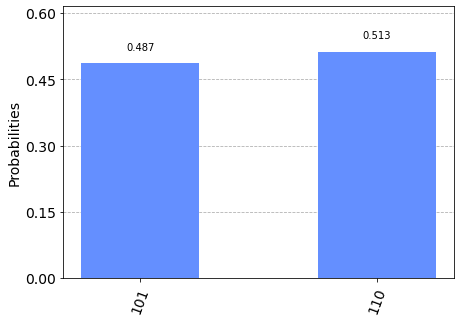

In [19]:
qc = QuantumCircuit(3)
qc = initialize_s(qc, [0,1,2])
qc.cz(0, 2)
qc.cz(1, 2)
qc.append(diffuser(3), [0,1,2])
qc.measure_all()

backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [20]:
# Problem 2-(e)

In [21]:
prob, count, U_num = 0, 0, 0
U_num += 1
q2 = QuantumRegister(3)
c2 = ClassicalRegister(3)
qc = QuantumCircuit(q2, c2)
qc = initialize_s(qc, [0, 1, 2])
qc.cz(0, 2)
qc.cz(1, 2)
while (prob != 1):
    for i in range(U_num):
        qc.append(diffuser(3), [0, 1, 2])
    correct = 0
    for j in range(100):
        qc.measure([0, 1, 2], [0, 1, 2])
        backend = Aer.get_backend('qasm_simulator')
        results = execute(qc, backend=backend, shots=1024).result()
        answer = results.get_counts()
        # Count
        maxi = 0
        bit = ""
        for i in answer:
            if (answer[i] > maxi):
                maxi = answer[i]
                bit = i
        if (bit == "110" or bit == "101"): 
            correct += 1
    prob = int(correct/100)
    count += 1
print("Query: ", count)

Query:  1


In [22]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 256

# Load local account information
#IBMQ.save_account('cdad9ef01fbad88f5ee99fa7fc4cfb7b5eb8755c52fd1697690c6b680797a57384a80d5a6bfd5e99332b8ee8a58e74e3903034a7f4c19eb9d29b9e3da35aff0d')
IBMQ.load_account()

# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

C:\Users\user\Downloads\anaconda\envs\IBMQ\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-11-08 15:38:48,345: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_athens


Job Status: job has successfully run


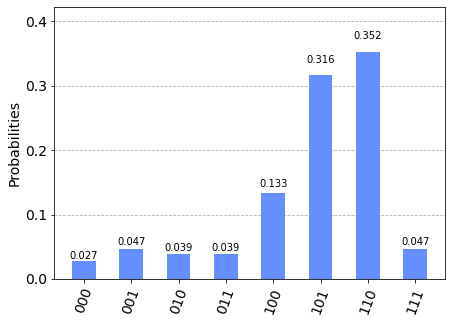

In [23]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor

q2 = QuantumRegister(3)
c2 = ClassicalRegister(3)
qc = QuantumCircuit(q2, c2)
qc = initialize_s(qc, [0, 1, 2])
qc.cz(0, 2)
qc.cz(1, 2)
qc.append(diffuser(3), [0, 1, 2])
qc.measure([0, 1, 2], [0, 1, 2])

# Run our circuit
job = execute(qc, backend=backend, shots=shots)
job_monitor(job)

# Plotting our result
result = job.result()
count = result.get_counts()
plot_histogram(count)

In [24]:
# Problem 2-(f)

{'000': 114, '001': 133, '010': 128, '011': 125, '100': 136, '101': 120, '110': 139, '111': 129}


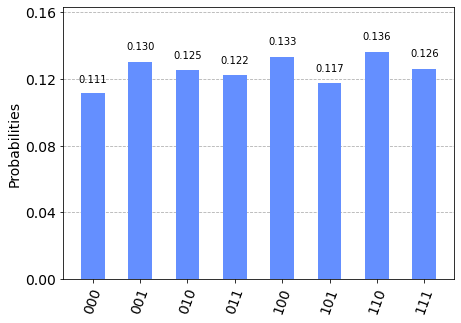

In [25]:
q2 = QuantumRegister(3)
c2 = ClassicalRegister(3)
qc = QuantumCircuit(q2, c2)
qc = initialize_s(qc, [0, 1, 2])
qc.cz(0, 2)
qc.cz(1, 2)
qc.cz(1, 0)
qc.append(diffuser(3), [0, 1, 2])
qc.measure([0, 1, 2], [0, 1, 2])
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
print(answer)

plot_histogram(answer)